# Convolution vs Cross-Correlation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, correlate2d, convolve, convolve2d

In [2]:
x = np.array([1, 2, 3, 4, 1, 2, 3, 4], np.float)
kernel = np.array([1, 2, 3], np.float)

In [5]:
convolve(x, kernel, 'valid')

array([10., 16., 18., 16., 10., 16.])

In [7]:
x[None, :, None].shape
# batch, signal dimention channel

(1, 8, 1)

In [9]:
kernel[:, None, None].shape
# kernel size, channel input, channel output

(3, 1, 1)

In [19]:
# input : 3d tensor
tf.nn.conv1d(x[None, :, None], kernel[:, None, None], 1, 'VALID').numpy()[0, :, 0] 

array([14., 20., 14., 12., 14., 20.])

In [20]:
correlate(x, kernel, 'valid')

array([14., 20., 14., 12., 14., 20.])

In [23]:
convolve(x, kernel[::-1], 'valid')

array([14., 20., 14., 12., 14., 20.])

In [31]:
x = np.arange(16).reshape((4, 4)).astype(np.float)
print(x)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]


In [32]:
kernel = np.arange(9).reshape((3, 3)).astype(np.float)
print(kernel)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [33]:
convolve2d(x, kernel, 'valid')

array([[102., 138.],
       [246., 282.]])

In [61]:
# 4d tensor input
# input : batch, height, width, channel
# kernel : height, width, channel input, channel output #2x2x1x1
tf.nn.conv2d(x[None, :, :, None], kernel[:, :, None, None], 1, 'VALID').numpy()[0, :, :, 0]

array([[258., 294.],
       [402., 438.]])

In [62]:
correlate2d(x, kernel, 'valid')

array([[258., 294.],
       [402., 438.]])

In [67]:
correlate2d(x, kernel[::-1, ::-1], 'valid')

array([[102., 138.],
       [246., 282.]])

In [74]:
kernel2 = np.arange(9, dtype=float).reshape((3,3)) + 1
print(kernel2)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [82]:
temp = convolve2d(x, kernel, 'full')
convolve2d(temp, kernel2, 'full')

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 6.0000e+00, 1.8000e+01,
        3.2000e+01, 3.3000e+01, 1.8000e+01],
       [0.0000e+00, 7.0000e+00, 4.1000e+01, 1.2600e+02, 2.4000e+02,
        3.0800e+02, 2.5300e+02, 1.2300e+02],
       [1.2000e+01, 9.7000e+01, 3.6200e+02, 8.2200e+02, 1.2900e+03,
        1.4300e+03, 1.0420e+03, 4.7100e+02],
       [9.6000e+01, 5.1400e+02, 1.5700e+03, 3.0060e+03, 4.1400e+03,
        4.1100e+03, 2.7460e+03, 1.1700e+03],
       [3.6000e+02, 1.5320e+03, 4.0860e+03, 6.9660e+03, 8.7840e+03,
        8.1020e+03, 5.0780e+03, 2.0640e+03],
       [7.4400e+02, 2.8010e+03, 6.8500e+03, 1.0806e+04, 1.2786e+04,
        1.1158e+04, 6.6620e+03, 2.6070e+03],
       [8.7600e+02, 3.0590e+03, 7.0450e+03, 1.0614e+04, 1.2024e+04,
        1.0120e+04, 5.7890e+03, 2.1870e+03],
       [5.0400e+02, 1.7100e+03, 3.8410e+03, 5.6700e+03, 6.2940e+03,
        5.2040e+03, 2.9130e+03, 1.0800e+03]])

In [83]:
temp = convolve2d(kernel, kernel2, 'full')
convolve2d(x, temp, 'full')

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 6.0000e+00, 1.8000e+01,
        3.2000e+01, 3.3000e+01, 1.8000e+01],
       [0.0000e+00, 7.0000e+00, 4.1000e+01, 1.2600e+02, 2.4000e+02,
        3.0800e+02, 2.5300e+02, 1.2300e+02],
       [1.2000e+01, 9.7000e+01, 3.6200e+02, 8.2200e+02, 1.2900e+03,
        1.4300e+03, 1.0420e+03, 4.7100e+02],
       [9.6000e+01, 5.1400e+02, 1.5700e+03, 3.0060e+03, 4.1400e+03,
        4.1100e+03, 2.7460e+03, 1.1700e+03],
       [3.6000e+02, 1.5320e+03, 4.0860e+03, 6.9660e+03, 8.7840e+03,
        8.1020e+03, 5.0780e+03, 2.0640e+03],
       [7.4400e+02, 2.8010e+03, 6.8500e+03, 1.0806e+04, 1.2786e+04,
        1.1158e+04, 6.6620e+03, 2.6070e+03],
       [8.7600e+02, 3.0590e+03, 7.0450e+03, 1.0614e+04, 1.2024e+04,
        1.0120e+04, 5.7890e+03, 2.1870e+03],
       [5.0400e+02, 1.7100e+03, 3.8410e+03, 5.6700e+03, 6.2940e+03,
        5.2040e+03, 2.9130e+03, 1.0800e+03]])

In [85]:
temp = correlate2d(x, kernel, 'full')
correlate2d(temp, kernel2, 'full')

array([[    0.,    72.,   271.,   636.,   810.,   734.,   375.,   126.],
       [  288.,   961.,  2075.,  3276.,  3516.,  2810.,  1351.,   429.],
       [  948.,  2833.,  5582.,  7914.,  7914.,  5930.,  2734.,   831.],
       [ 1896.,  5392., 10138., 13626., 13104.,  9474.,  4258.,  1260.],
       [ 1800.,  4934.,  8910., 11610., 10764.,  7490.,  3206.,   894.],
       [ 1104.,  2873.,  4870.,  6090.,  5298.,  3418.,  1298.,   303.],
       [  372.,   917.,  1447.,  1740.,  1404.,   814.,   263.,    45.],
       [   72.,   162.,   223.,   252.,   174.,    74.,    15.,     0.]])

In [84]:
temp = correlate2d(kernel, kernel2, 'full')
correlate2d(x, temp, 'full')

array([[0.0000e+00, 8.0000e+00, 3.9000e+01, 1.1400e+02, 1.9000e+02,
        2.1600e+02, 1.3500e+02, 5.4000e+01],
       [3.2000e+01, 1.6900e+02, 4.9500e+02, 9.5400e+02, 1.2640e+03,
        1.2200e+03, 6.9900e+02, 2.6100e+02],
       [2.1200e+02, 8.4700e+02, 2.1180e+03, 3.5460e+03, 4.2460e+03,
        3.7700e+03, 2.0460e+03, 7.2900e+02],
       [7.0400e+02, 2.4380e+03, 5.5020e+03, 8.2740e+03, 9.1560e+03,
        7.5860e+03, 3.9420e+03, 1.3500e+03],
       [1.2400e+03, 3.9960e+03, 8.4900e+03, 1.2090e+04, 1.2736e+04,
        1.0090e+04, 5.0340e+03, 1.6560e+03],
       [1.3360e+03, 4.1270e+03, 8.4300e+03, 1.1610e+04, 1.1822e+04,
        9.0820e+03, 4.3620e+03, 1.3770e+03],
       [6.2800e+02, 1.8530e+03, 3.6030e+03, 4.7700e+03, 4.6160e+03,
        3.3760e+03, 1.4670e+03, 4.0500e+02],
       [1.6800e+02, 4.5800e+02, 8.0700e+02, 9.7800e+02, 8.2600e+02,
        5.1600e+02, 1.3500e+02, 0.0000e+00]])

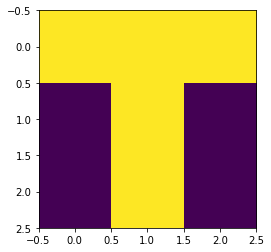

In [93]:
T = np.array([[1, 1, 1],
              [0 ,1, 0],
              [0, 1, 0]], np.float)
plt.imshow(T)
plt.show()

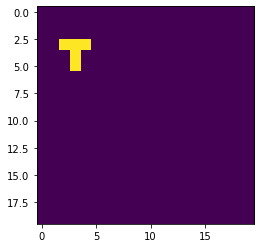

In [87]:
img = np.zeros((20, 20), np.float)
img[3:6, 2:5] = T
plt.imshow(img)
plt.show()

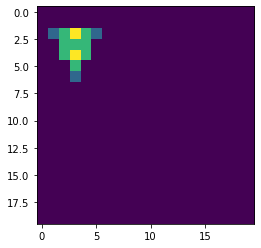

In [88]:
temp = convolve2d(img, T, 'same')
plt.imshow(temp)
plt.show()

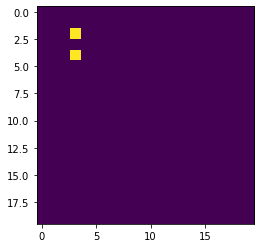

In [89]:
plt.imshow(temp == temp.max())
plt.show()

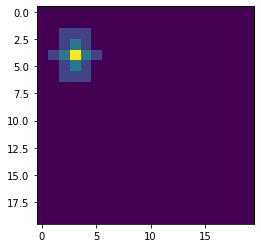

In [90]:
temp = correlate2d(img, T, 'same')
plt.imshow(temp)
plt.show()

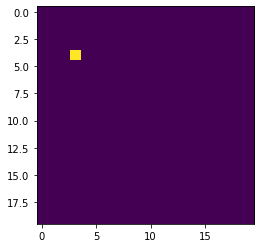

In [91]:
plt.imshow(temp == temp.max())
plt.show()